# Import Dependencies

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Import CSV Data to Pandas DataFrame

In [2]:
#Load the Data
salary = pd.read_csv('./data_cleaned_2021.csv')


## Data Exploration

In [3]:
salary.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [4]:
salary.select_dtypes(include=object)

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors,company_txt,Job Location,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Tecolote Research,NM,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,University of Maryland Medical System,MD,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,KnowBe4,FL,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",PNNL,WA,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Affinity Solutions,NY,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",GSK,MA,other scientist,sr,M
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",Eventbrite,TN,data engineer,sr,na
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,Software Engineering Institute,PA,other scientist,na,P
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,"Numeric, LLC",PA,data scientist,na,na


In [5]:
salary.shape

(742, 42)

In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

In [7]:
# Check for missing Values
salary.isnull().sum()

index                 0
Job Title             0
Salary Estimate       0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded               0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Hourly                0
Employer provided     0
Lower Salary          0
Upper Salary          0
Avg Salary(K)         0
company_txt           0
Job Location          0
Age                   0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree          

In [8]:
salary.describe()

,index,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,...,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,279.793117,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,...,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
salary.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [10]:
salary["Job Location"].unique()

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'OR', 'CT', 'MI', 'DC', 'OH', 'AL', 'MO', 'PA', 'GA',
       'IN', 'LA', 'WI', 'NC', 'AZ', 'NE', 'MN', 'UT', 'TN', 'DE', 'ID',
       'RI', 'IA', 'SC', 'KS'], dtype=object)

In [11]:
salary["Industry"].unique()

array(['Aerospace & Defense', 'Health Care Services & Hospitals',
       'Security Services', 'Energy', 'Advertising & Marketing',
       'Real Estate', 'Banks & Credit Unions', 'Consulting', 'Internet',
       'Other Retail Stores', 'Research & Development',
       'Department, Clothing, & Shoe Stores', 'Biotech & Pharmaceuticals',
       'Motion Picture Production & Distribution',
       'Enterprise Software & Network Solutions', 'Insurance Carriers',
       'Insurance Agencies & Brokerages', 'Logistics & Supply Chain',
       'Telecommunications Services', 'IT Services',
       'Computer Hardware & Software', '-1',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Metals Brokers', 'Financial Transaction Processing',
       'Sporting Goods Stores', 'Staffing & Outsourcing', 'Wholesale',
       'Mining', 'Financial Analytics & Research', 'Federal Agencies',
       'Education Training Services',
       'Transportation Equipment Manufacturing', 'Farm Support 

In [12]:
salary["Company Name"].value_counts()

MassMutual\n3.6                                         14
Reynolds American\n3.1                                  14
Takeda Pharmaceuticals\n3.7                             14
Software Engineering Institute\n2.6                     11
PNNL\n3.8                                               10
                                                        ..
Dayton Freight Lines, Inc.\n4.3                          1
Community Action Partnership of San Luis Obispo\n2.8     1
TrueAccord\n3.4                                          1
DRB Systems\n4.0                                         1
Fivestars\n3.9                                           1
Name: Company Name, Length: 343, dtype: int64

## Preprocessing the Data 

In [13]:
reduce_salary = salary.drop(columns=["index","Job Description","Company Name","Job Title","Rating","Size","seniority_by_title","Salary Estimate","Headquarters","Founded","Location", "Industry","Competitors","Hourly","Employer provided", "company_txt", "Lower Salary", "Upper Salary"])
reduce_salary.head()

,Type of ownership,Sector,Revenue,Avg Salary(K),Job Location,Age,Python,spark,aws,excel,...,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,Degree
0,Company - Private,Aerospace & Defense,$50 to $100 million (USD),72.0,NM,48,1,0,0,1,...,0,0,0,1,1,0,0,0,data scientist,M
1,Other Organization,Health Care,$2 to $5 billion (USD),87.5,MD,37,1,0,0,0,...,0,0,0,0,0,0,0,0,data scientist,M
2,Company - Private,Business Services,$100 to $500 million (USD),85.0,FL,11,1,1,0,1,...,0,0,0,0,0,0,0,0,data scientist,M
3,Government,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),76.5,WA,56,1,0,0,0,...,0,0,0,0,0,0,0,0,data scientist,na
4,Company - Private,Business Services,Unknown / Non-Applicable,114.5,NY,23,1,0,0,1,...,0,0,0,0,0,0,0,0,data scientist,na


In [14]:
reduce_salary.select_dtypes(include=object)

,Type of ownership,Sector,Revenue,Job Location,job_title_sim,Degree
0,Company - Private,Aerospace & Defense,$50 to $100 million (USD),NM,data scientist,M
1,Other Organization,Health Care,$2 to $5 billion (USD),MD,data scientist,M
2,Company - Private,Business Services,$100 to $500 million (USD),FL,data scientist,M
3,Government,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),WA,data scientist,na
4,Company - Private,Business Services,Unknown / Non-Applicable,NY,data scientist,na
...,...,...,...,...,...,...
737,Company - Public,Biotech & Pharmaceuticals,$10+ billion (USD),MA,other scientist,M
738,Company - Public,Information Technology,$100 to $500 million (USD),TN,data engineer,na
739,College / University,Education,Unknown / Non-Applicable,PA,other scientist,P
740,Company - Private,Business Services,$5 to $10 million (USD),PA,data scientist,na


In [15]:
salary['Avg Salary(K)'].value_counts()

87.5     12
140.0    11
81.0     11
85.0     10
107.5    10
         ..
157.0     1
174.0     1
179.5     1
232.5     1
111.0     1
Name: Avg Salary(K), Length: 219, dtype: int64

In [16]:
#Transform the categorical data to numeric data
salary_dummies = pd.get_dummies(reduce_salary)
salary_dummies.head()

,Avg Salary(K),Age,Python,spark,aws,excel,sql,sas,keras,pytorch,...,job_title_sim_data engineer,job_title_sim_data modeler,job_title_sim_data scientist,job_title_sim_director,job_title_sim_machine learning engineer,job_title_sim_na,job_title_sim_other scientist,Degree_M,Degree_P,Degree_na
0,72.0,48,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,87.5,37,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,85.0,11,1,1,0,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,76.5,56,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,114.5,23,1,0,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [17]:
import numpy as np 

np.log(salary_dummies["Avg Salary(K)"])

0      4.276666
1      4.471639
2      4.442651
3      4.337291
4      4.740575
         ...   
737    4.436752
738    4.629863
739    4.297285
740    4.848116
741    4.537961
Name: Avg Salary(K), Length: 742, dtype: float64

## Separate the Features(X) from the Target(Y)

In [18]:
# Create our features 
X = salary_dummies.drop(columns="Avg Salary(K)")

# Create our target 
#y = np.log(salary_dummies["Avg Salary(K)"]).values
y = salary_dummies["Avg Salary(K)"]

In [19]:
y.shape

(742,)

## Split the data into training and testing 

In [20]:
# Use train_test_split to create training and testing data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
# Create the model by using LinearRegression.

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [22]:
# Fit the model to the data

model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Print the coefficient and the intercept for the model.

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [ 1.04335790e-02  9.45662070e+00 -3.58379898e+00  2.49422393e+00
  2.80666952e+00 -4.75686367e+00  1.09098662e+01  1.75658493e+01
 -1.24875641e+01  2.50866809e+00  4.73577528e+00  2.19051091e+00
 -1.65108310e+00  9.98728332e+00  1.78194170e+00  9.86392545e+00
 -1.05288986e+01 -8.40261029e+11 -8.40261029e+11 -8.40261029e+11
 -8.40261029e+11 -8.40261029e+11 -8.40261029e+11 -8.40261029e+11
 -8.40261029e+11 -8.40261029e+11  8.03872120e+10  8.03872120e+10
  8.03872119e+10  8.03872119e+10  8.03872119e+10  8.03872120e+10
  8.03872119e+10  8.03872119e+10  8.03872119e+10  8.03872119e+10
  8.03872119e+10  8.03872119e+10  8.03872120e+10  8.03872120e+10
  8.03872120e+10  8.03872119e+10  8.03872120e+10 -1.23467675e+09
  8.03872119e+10  8.03872119e+10  8.03872119e+10  8.03872120e+10
  8.03872119e+10  8.03872119e+10  8.03872119e+10 -1.14075979e+12
 -1.14075979e+12 -1.14075979e+12 -1.14075979e+12 -1.14075979e+12
 -1.14075979e+12 -1.14075979e+12 -1.14075979e+12 -1.14075979e+12
 -1

In [24]:
#Predecting the test set results
y_pred = model.predict(X_test)
print(y_pred.shape)

(186,)


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2

-7.299880743582402e+16

In [26]:
# Calculate the scores for the training and testing data.

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5774150405740237
Testing Score: -7.299880743582402e+16


In [27]:
#Random Forest Feature Importance 
from sklearn.ensemble import RandomForestRegressor

model_2 = RandomForestRegressor()

model_2.fit(X_train, y_train)

print(f'model score on training data: {model_2.score(X_train, y_train)}')
print(f'model score on testing data: {model_2.score(X_test, y_test)}')

model score on training data: 0.9431295661248498
model score on testing data: 0.6492095833697138


In [28]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

## Random Forest Regressor 

In [29]:
# Create our features 
X = salary_dummies.drop(columns="Avg Salary(K)")

# Create our target 
y = salary_dummies["Avg Salary(K)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [30]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
print(f'model score on training data: {rf.score(X_train, y_train)}')
print(f'model score on testing data: {rf.score(X_test, y_test)}')

model score on training data: 0.9425961066770325
model score on testing data: 0.634892979505611


## Feature Importance

In [32]:
rf.feature_importances_

array([1.18603348e-01, 2.30528527e-02, 5.75644705e-03, 1.21119844e-02,
       1.59275661e-02, 1.03460473e-02, 1.67084993e-02, 4.54668651e-03,
       1.91457258e-03, 2.90351216e-02, 7.94833663e-03, 6.21170383e-03,
       7.65727963e-03, 3.66276344e-03, 2.06585269e-04, 5.49108314e-03,
       1.09950855e-03, 1.53904312e-03, 6.99821416e-03, 2.72691916e-02,
       9.24846821e-04, 6.09925224e-05, 1.86485283e-03, 1.13920666e-04,
       1.97604950e-07, 7.67151619e-03, 9.76128160e-04, 1.41799568e-04,
       8.60040591e-04, 2.40599390e-05, 3.66593485e-04, 7.61698908e-03,
       8.39587281e-03, 4.02187078e-04, 4.66529524e-04, 2.83525057e-03,
       3.75398182e-03, 7.10475141e-04, 4.11558595e-03, 2.96764646e-02,
       1.08536795e-02, 1.26883774e-03, 1.57570712e-03, 0.00000000e+00,
       3.18682353e-04, 7.30303792e-04, 8.83786062e-04, 1.88657043e-03,
       6.96453047e-05, 1.49249264e-04, 3.25245851e-04, 8.37041489e-03,
       3.83175306e-04, 6.72424155e-03, 1.71530238e-02, 9.12910562e-03,
      

In [33]:
#salary_dummies.columns[0:20]
rf.feature_importances_[0:20]

array([0.11860335, 0.02305285, 0.00575645, 0.01211198, 0.01592757,
       0.01034605, 0.0167085 , 0.00454669, 0.00191457, 0.02903512,
       0.00794834, 0.0062117 , 0.00765728, 0.00366276, 0.00020659,
       0.00549108, 0.00109951, 0.00153904, 0.00699821, 0.02726919])

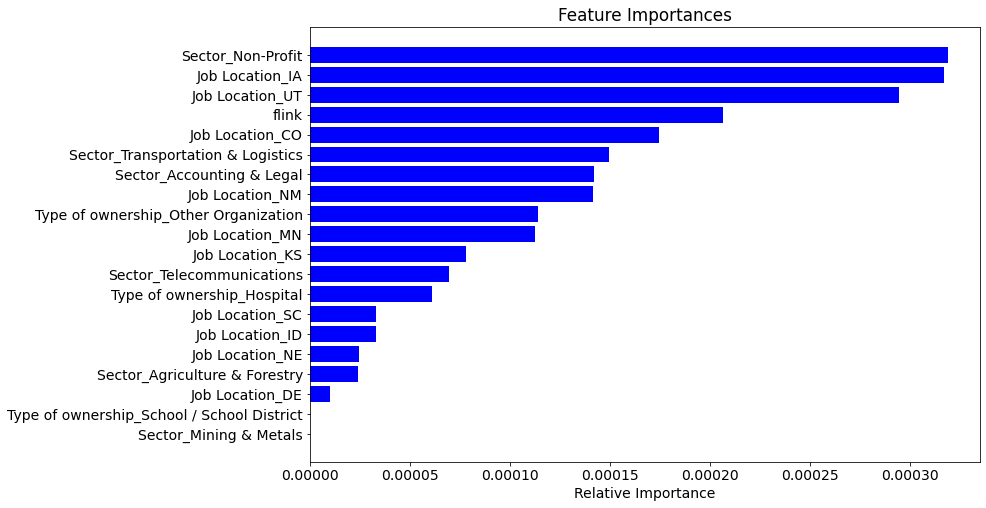

In [35]:
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[0:20]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.figure(figsize=(40, 15))
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()